# Aprendizaje **no supervisado** y **semisupervisado**


## Objetivos
- Entender no supervisado vs. supervisado.
- Practicar **K-Means** (agrupación) y **PCA** (reducción de dimensionalidad).
- Introducción a **aprendizaje semisupervisado** con `LabelSpreading`.
- Interpretar resultados y limitaciones.


## 1) Conceptos clave
- **No supervisado**: no hay etiquetas; buscamos estructura en los datos (agrupación, detección de anomalías, patrones).
- **K-Means**: iterativo; inicializa K centroides → asigna puntos al centro más cercano → recalcula centroides → repite.
- **PCA**: proyecta a nuevas variables (componentes) maximizando **varianza** → útil para visualizar y reducir ruido.
- **Semisupervisado**: pocos datos etiquetados + muchos sin etiqueta. Propagación de etiquetas usando similitud (ej. `LabelSpreading`).
- **ARI (Adjusted Rand Index)**: mide la similitud entre los clusters obtenidos y las clases reales, ajustando el azar. Valores entre –1 y 1 → 1 = agrupación perfecta, 0 = aleatoria.


## 2) K-Means en datos sintéticos

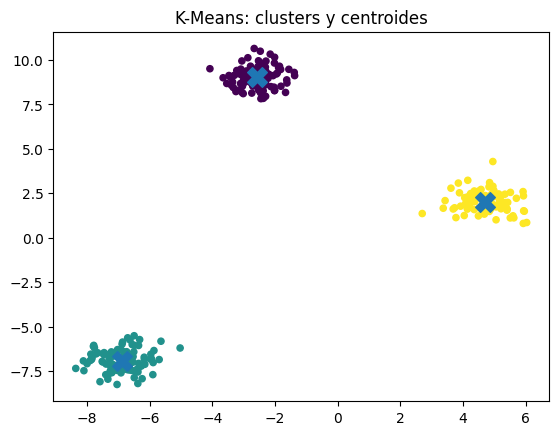

Centroides:
 [[-2.58361866  9.03185632]
 [-6.88217395 -6.94243433]
 [ 4.70421356  1.99562444]]


In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels, s=20)
plt.scatter(centers[:,0], centers[:,1], s=200, marker='X')
plt.title('K-Means: clusters y centroides')
plt.show()

print('Centroides:\n', centers)



## 3) K-Means en **Iris** + evaluación rápida
*(Comparamos con las clases reales solo para inspección, aunque K-Means NO usa etiquetas).*

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

X, y = load_iris(return_X_y=True)
km = KMeans(n_clusters=3, n_init=10, random_state=42).fit(X)
print('ARI (con clases reales, solo inspección):', adjusted_rand_score(y, km.labels_))


ARI (con clases reales, solo inspección): 0.7302382722834697


## 4) PCA para visualizar en 2D

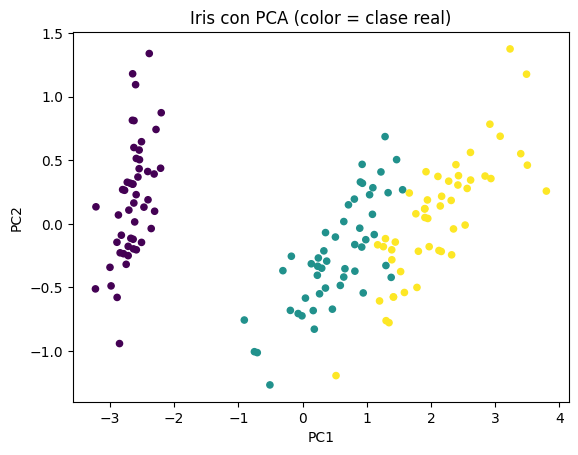

Varianza explicada por PC1+PC2: 0.9776852063187963


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=y, s=20)
plt.title('Iris con PCA (color = clase real)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

print('Varianza explicada por PC1+PC2:', pca.explained_variance_ratio_.sum())


## 5) Semisupervisado con **LabelSpreading**

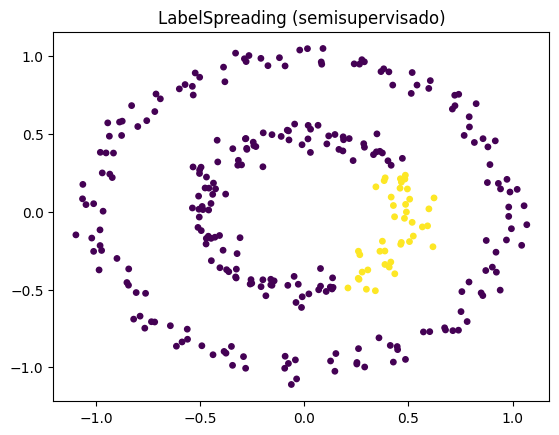

Etiquetas propagadas (conteo): {0: 258, 1: 42}


In [5]:
from sklearn.datasets import make_circles
from sklearn.semi_supervised import LabelSpreading
import numpy as np, matplotlib.pyplot as plt

X, y_true = make_circles(n_samples=300, factor=.5, noise=.05, random_state=42)
labels = -np.ones(len(y_true))
labels[0] = 0
labels[1] = 1

model = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.8)
model.fit(X, labels)
y_pred = model.transduction_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_pred, s=15)
plt.title('LabelSpreading (semisupervisado)')
plt.show()

print('Etiquetas propagadas (conteo):', {int(k):int((y_pred==k).sum()) for k in np.unique(y_pred)})


## 6) Ejercicios
1. **K de K-Means**: prueba K=2…6 y dibuja *inertia_*; aplica método del **codo**.
2. **Inicialización**: compara `n_init=1` vs `n_init=10` y discute estabilidad.
3. **PCA**: ¿cuánta varianza explican 2 componentes en Iris? ¿y 3? Justifica su utilidad.
4. **Semisupervisado**: cambia cuántos puntos están etiquetados (p. ej., 1 por clase vs 5 por clase). ¿Qué pasa?
5. Visualiza K-Means **después** de PCA (clustering en 2D) y compara ARI.


ARI sin PCA: 0.7302
ARI con PCA (2D): 0.7163
Guillermo García Hernández


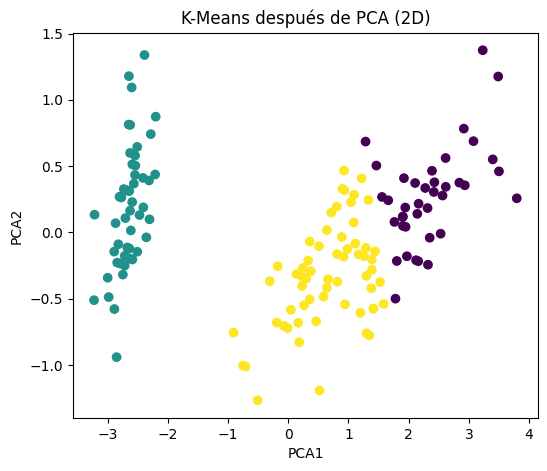

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar Iris
X, y = load_iris(return_X_y=True)

# --- ARI SIN PCA ---
km_original = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_original = km_original.fit_predict(X)
ari_original = adjusted_rand_score(y, labels_original)

# --- PCA A 2 COMPONENTES ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- ARI DESPUÉS DE PCA ---
km_pca = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_pca = km_pca.fit_predict(X_pca)
ari_pca = adjusted_rand_score(y, labels_pca)

print("ARI sin PCA:", round(ari_original, 4))
print("ARI con PCA (2D):", round(ari_pca, 4))
print("Guillermo García Hernández")

# --- Gráfico ---
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_pca, cmap="viridis")
plt.title("K-Means después de PCA (2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()





---
**Notas docentes**: K-Means asume clusters esféricos y balanceados; PCA es lineal; en semisupervisado, la calidad depende de etiquetas semilla y de la métrica de similitud.
